In [126]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline
%matplotlib inline
from yellowbrick.text import FreqDistVisualizer

In [128]:
df = pd.read_csv('C:\TextMining\Input\\train_new1.csv')
df = df[pd.notnull(df['Label'])]
df.head(10)

,R_context,Filename,number_of_words,Label
0,"b""Abdul Sattar Syed 224-229-0646 sattar419@y...",C:\TextMining\Input\Single\Abdul Syed resume.docx,1445,INFORMATICA
1,"b'Abdul Khadir Banaswadi | Bangalore, India ...",C:\TextMining\Input\Single\Abdul_khadir_Bengal...,1798,DATASCIENCE
2,[] Abhishek Prasad Address: Vaastu La...,C:\TextMining\Input\Single\AbhishekPrasad[3_0]...,616,UI
3,"b""RESUME \t \tAhamed Ac \tEmail: acahamed57...",C:\TextMining\Input\Single\Ahamed[2_4].docx,769,UI
4,"b""Profile Summary \tProfessional with around ...",C:\TextMining\Input\Single\Analytics_Datascien...,1585,DATASCIENCE
5,"b""Professional Summary: Certified Advanced ...",C:\TextMining\Input\Single\Analytics_Developer...,4366,DATASCIENCE
6,b'RESUME Anand A Email : anandcatchme...,C:\TextMining\Input\Single\Anand_A_Informatica...,1275,INFORMATICA
7,"ANSHUL GUPTA Noida, UP 201307 | 8383041105...",C:\TextMining\Input\Single\AnshulGupta[3_5].pdf,1074,UI
8,"b""SUMMARY ARPIT JAIN System Engineer ...",C:\TextMining\Input\Single\ArpitJain[4_0].docx,546,UI
9,"b""PROFESSIONAL EXPERIENCE \t\t ...",C:\TextMining\Input\Single\BANKAR_Sachin_EDWH_...,1282,DATASTAGE


In [129]:
print(df.columns)

Index(['R_context', 'Filename', 'number_of_words', 'Label'], dtype='object')


In [130]:
df['R_context'].replace('\\t\t', '').replace('\n', '')
df['R_context'].replace('\t*', '').replace('\n', '')
df['R_context'].astype(str)

0     b"Abdul Sattar Syed  224-229-0646  sattar419@y...
1     b'Abdul Khadir  Banaswadi | Bangalore, India  ...
2     []  Abhishek Prasad       Address:   Vaastu La...
3     b"RESUME  \t  \tAhamed Ac  \tEmail: acahamed57...
4     b"Profile Summary  \tProfessional with around ...
5     b"Professional Summary:    Certified Advanced ...
6     b'RESUME    Anand A  Email     :  anandcatchme...
7     ANSHUL   GUPTA   Noida, UP 201307 | 8383041105...
8     b"SUMMARY     ARPIT JAIN      System Engineer ...
9     b"PROFESSIONAL EXPERIENCE    \t\t             ...
10    b"Arjun Baredi\t\t\t\t     \t  \t\t      Email...
11    b'Abdul Khadir  Banaswadi | Bangalore, India  ...
12    b"Bindu Madhavi Garimidi  putta.informatica@gm...
13    b'Email id: BINOD.KR99@GMAIL.COM  Cell: +91-90...
14    b"Birendra Kumar Shaw\t\t\t\tE-mail:krshaw.bir...
15    b"Chetan M Mangsuli  chetanmangsuli84@gmail.co...
16    b"RESUME      MOHAMMED AMIR BAGALI\t\t\t\t\t\t...
17    b"Deepak Kumar Das                        

In [131]:
df['R_context'].apply(lambda x: len(str(x).split())).sum()
#df['number_of_words1'] = df.R_context.apply(lambda x: len(x.split()))

80446

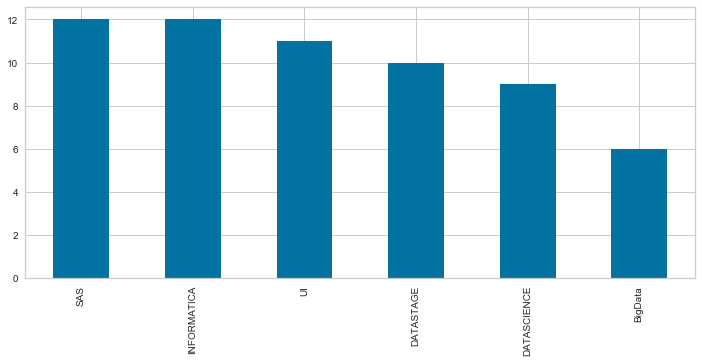

In [132]:

my_tags = ['Infromatica','SAS','DataStage','UI','DataScience','BigData']
plt.figure(figsize=(12,5))
df.Label.value_counts().plot(kind='bar');

In [133]:
def print_plot(index):
    example = df[df.index == index][['R_context', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [134]:

print_plot(10)

b"Arjun Baredi\t\t\t\t     \t  \t\t      Email id: barediarjun1@gmail.com \t\t\t\t\t\t\t\t\t      Mobile No: +91 8688027125     Professional Summary:  Having around 3+ years of experience in Hadoop, Spark, and Related Ecosystems.  Practical exposure and strong knowledge in Spark with Scala.  Strong knowledge of Hadoop (HDFS), Hive, MapReduce, YARN, SQOOP, HBase, Zookeeper, Flume, and Oozie.  Hands on experience in writing hive queries using Hive Query Language.  Experience with excel (csv), Json and xml files.  Experience in semi-structured data processing in Hive.  Experience with Hive queries performance tuning.  Writing RDD\xe2\x80\x99s and Data frames to perform faster Data analysis using Spark.  Involved in creating tables, partitioning, bucketing of table in hive.  Importing and exporting the data from Database to HDFS using Sqoop.  Accessed the streaming data from various sources and pushed to Hdfs by using Flume   Involved in Integrations like a hive with Hbase, flume with spar

In [119]:
#df['R_context'] = df['R_context'].str.replace('\t*', '')

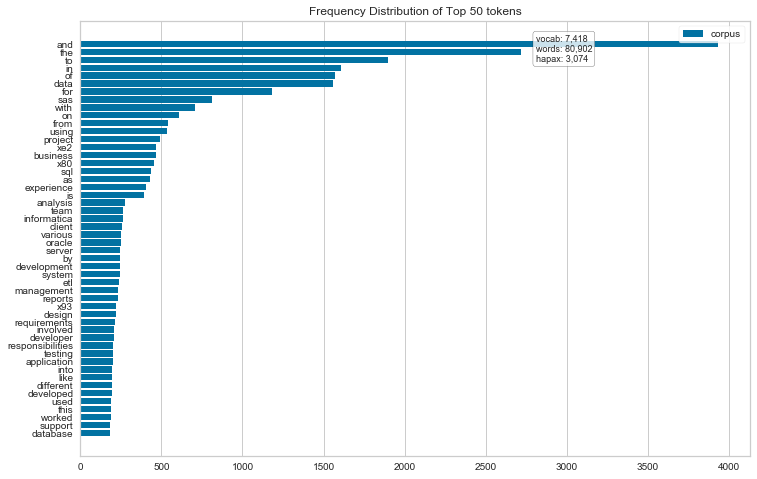

In [135]:
#Visualize Token (vocabulary) Frequency Distribution Before Text Preprocessing
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['R_context'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()

In [136]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [137]:
#df['R_context'] = df['R_context'].str.replace('t*tt*', '')
df['R_context'] = (df['R_context']).apply(clean_text)

In [123]:
print_plot(10)

barjun baredi email id barediarjun1 gmailcom mobile +91 8688027125 professional summary around 3+ years experience hadoop spark relaed ecosysems pracical exposure srong knowledge spark scala srong knowledge hadoop hdfs hive mapreduce yarn sqoop hbase zookeeper flume oozie hands experience wriing hive queries using hive query language experience excel csv json xml files experience semisrucured daa processing hive experience hive queries performance uning wriing rddxe2x80x99s daa frames perform faser daa analysis using spark involved creaing ables pariioning buckeing able hive imporing exporing daa daabase hdfs using sqoop accessed sreaming daa various sources pushed hdfs using flume involved inegraions like hive hbase flume spark spark hive involved random realime read wrie access using nosql like hbase good knowledge spark archiecure execuion model good undersanding rdbms sql daabase design wriing queries using daabase like oracle mysql abiliy learn new echnologies deliver oupus shor d

In [138]:
df['R_context'].apply(lambda x: len(x.split(' '))).sum()

60221

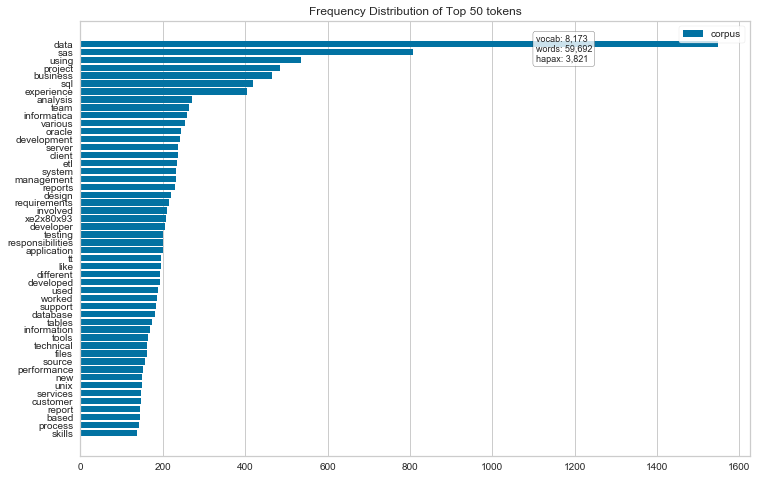

In [139]:
#Visualize Token Frequency Distribution After Text Preprocessing
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df['R_context'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()

In [110]:
X = df.R_context
y = df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [111]:
#Naive Bayes classifier for multinomial models

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [140]:

#Naive Bayes classifier for multinomial models
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6666666666666666
              precision    recall  f1-score   support

 Infromatica       1.00      1.00      1.00         1
         SAS       0.50      0.50      0.50         2
   DataStage       0.00      0.00      0.00         4
          UI       0.50      1.00      0.67         4
 DataScience       0.80      0.80      0.80         5
     BigData       1.00      1.00      1.00         2

   micro avg       0.67      0.67      0.67        18
   macro avg       0.63      0.72      0.66        18
weighted avg       0.56      0.67      0.59        18



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [142]:
y_pred

array(['INFORMATICA', 'SAS', 'INFORMATICA', 'SAS', 'INFORMATICA', 'SAS',
       'INFORMATICA', 'SAS', 'INFORMATICA', 'DATASCIENCE', 'SAS',
       'BigData', 'INFORMATICA', 'UI', 'DATASCIENCE', 'INFORMATICA', 'UI',
       'INFORMATICA'], dtype='<U11')

In [143]:
y_test

0     INFORMATICA
5     DATASCIENCE
36      DATASTAGE
45            SAS
13      DATASTAGE
54            SAS
33      DATASTAGE
48            SAS
12    INFORMATICA
57    DATASCIENCE
46            SAS
50        BigData
31    INFORMATICA
3              UI
52            SAS
17      DATASTAGE
8              UI
6     INFORMATICA
Name: Label, dtype: object

In [144]:
#Misclassified:
for x, y, y_hat in zip(X_test, y_test, y_pred):
    if y != y_hat:
        #print(f'R_context: {x} tag: {y} tag_pred: {y_hat}')print(f'R_context: {x} tag: {y} tag_pred: {y_hat}')
         print(f'R_context:   tag: {y} tag_pred: {y_hat}')

R_context:   tag: DATASCIENCE tag_pred: SAS
R_context:   tag: DATASTAGE tag_pred: INFORMATICA
R_context:   tag: DATASTAGE tag_pred: INFORMATICA
R_context:   tag: DATASTAGE tag_pred: INFORMATICA
R_context:   tag: SAS tag_pred: DATASCIENCE
R_context:   tag: DATASTAGE tag_pred: INFORMATICA


In [145]:
#Linear support vector machine

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [146]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8888888888888888
              precision    recall  f1-score   support

 Infromatica       1.00      1.00      1.00         1
         SAS       0.00      0.00      0.00         2
   DataStage       1.00      1.00      1.00         4
          UI       1.00      1.00      1.00         4
 DataScience       0.71      1.00      0.83         5
     BigData       1.00      1.00      1.00         2

   micro avg       0.89      0.89      0.89        18
   macro avg       0.79      0.83      0.81        18
weighted avg       0.81      0.89      0.84        18



R_context:   tag: DATASCIENCE tag_pred: SAS
R_context:   tag: DATASCIENCE tag_pred: SAS


In [148]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [149]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8333333333333334
              precision    recall  f1-score   support

 Infromatica       1.00      1.00      1.00         1
         SAS       0.33      0.50      0.40         2
   DataStage       1.00      1.00      1.00         4
          UI       1.00      1.00      1.00         4
 DataScience       0.75      0.60      0.67         5
     BigData       1.00      1.00      1.00         2

   micro avg       0.83      0.83      0.83        18
   macro avg       0.85      0.85      0.84        18
weighted avg       0.86      0.83      0.84        18



In [150]:
#Misclassified:
for x, y, y_hat in zip(X_test, y_test, y_pred):
    if y != y_hat:
        #print(f'R_context: {x} tag: {y} tag_pred: {y_hat}')print(f'R_context: {x} tag: {y} tag_pred: {y_hat}')
         print(f'R_context:   tag: {y} tag_pred: {y_hat}')

R_context:   tag: DATASCIENCE tag_pred: SAS
R_context:   tag: SAS tag_pred: DATASCIENCE
R_context:   tag: SAS tag_pred: DATASCIENCE
